# Imports

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import svm
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

# Load Data

In [ ]:
%cd '/content/drive/My Drive/IIITD/SEM-7/ML/ML Project/Code/Dataset'

/content/drive/My Drive/IIITD/SEM-7/ML/ML Project/Code/Dataset


In [ ]:
train_data = pd.read_csv('subtask_A_preprocessed.csv',index_col='id')
X_test = pd.read_csv('subtask_A_preprocessed_test.csv',index_col='id')
y_test = pd.read_csv('labels-levela.csv',index_col=0,header=None)

In [ ]:
X_train = train_data.drop(columns=['subtask_a'])
y_train = train_data['subtask_a']

## Standardize

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
k_fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# Models

## Logistic Regression

### Cross Validation

In [ ]:
fold_count = 0
accuracy = [0 for i in range(k_fold.get_n_splits())]
f1_scores = [0 for i in range(k_fold.get_n_splits())]

for train_index, test_index in k_fold.split(X_train, y_train):
    
    fold_count+=1
    print('Fold:',fold_count)

    # initialization
    X_train_temp, X_test_temp = X_train[train_index], X_train[test_index]
    y_train_temp, y_test_temp = y_train.iloc[train_index], y_train.iloc[test_index]
    log_classifier = LogisticRegression()

    # training
    log_classifier = log_classifier.fit(X_train_temp,y_train_temp)

    # prediction
    y_pred_temp = log_classifier.predict(X_test_temp)

    # evaluation
    accuracy[fold_count-1] = accuracy_score(y_test_temp,y_pred_temp)
    f1_scores[fold_count-1] = f1_score(y_test_temp, y_pred_temp, average='macro')
    
    print('accuracy:',accuracy[fold_count-1])
    print('f1 score:',f1_scores[fold_count-1])
    print()


print('Overall')
print('accuracy:',np.mean(accuracy))
print('f1 score:',np.mean(f1_scores))

Fold: 1
accuracy: 0.7477341389728097
f1 score: 0.7051828473559751

Fold: 2
accuracy: 0.7356495468277946
f1 score: 0.6887384301239942

Fold: 3
accuracy: 0.7371601208459214
f1 score: 0.6926188824251481

Fold: 4
accuracy: 0.7462235649546828
f1 score: 0.7007748600947051

Fold: 5
accuracy: 0.7428247734138973
f1 score: 0.6964508602467832

Overall
accuracy: 0.7419184290030211
f1 score: 0.6967531760493212


### Training

In [ ]:
# log_classifier = LogisticRegression()

In [ ]:
# log_classifier = log_classifier.fit(X_train,y_train)

In [ ]:
# joblib.dump(log_classifier,'logregression.model')

['logregression.model']

In [ ]:
log_classifier = joblib.load('logregression.model')

### Prediction

In [ ]:
y_pred_logistic = log_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

         NOT       0.84      0.88      0.86       620
         OFF       0.64      0.57      0.60       240

    accuracy                           0.79       860
   macro avg       0.74      0.72      0.73       860
weighted avg       0.78      0.79      0.79       860



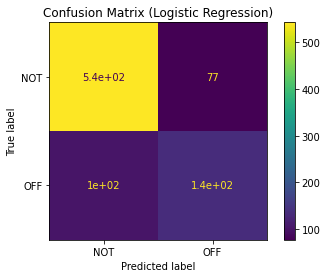

In [ ]:
plot = plot_confusion_matrix(log_classifier,X_test,y_test)
plot.ax_.set_title("Confusion Matrix (Logistic Regression)")
plt.show()

## Naive Bayes Classifier

### Cross Validation


In [ ]:
fold_count = 0
accuracy = [0 for i in range(k_fold.get_n_splits())]
f1_scores = [0 for i in range(k_fold.get_n_splits())]

for train_index, test_index in k_fold.split(X_train, y_train):
    
    fold_count+=1
    print('Fold:',fold_count)

    # initialization
    X_train_temp, X_test_temp = X_train[train_index], X_train[test_index]
    y_train_temp, y_test_temp = y_train.iloc[train_index], y_train.iloc[test_index]
    nb_classifier = GaussianNB()

    # training
    nb_classifier = nb_classifier.fit(X_train_temp,y_train_temp)

    # prediction
    y_pred_temp = nb_classifier.predict(X_test_temp)

    # evaluation
    accuracy[fold_count-1] = accuracy_score(y_test_temp,y_pred_temp)
    f1_scores[fold_count-1] = f1_score(y_test_temp, y_pred_temp, average='macro')
    
    print('accuracy:',accuracy[fold_count-1])
    print('f1 score:',f1_scores[fold_count-1])
    print()


print('Overall')
print('accuracy:',np.mean(accuracy))
print('f1 score:',np.mean(f1_scores))

Fold: 1
accuracy: 0.6125377643504532
f1 score: 0.6018423260157326

Fold: 2
accuracy: 0.6068731117824774
f1 score: 0.596578649856029

Fold: 3
accuracy: 0.6185800604229608
f1 score: 0.605732801448237

Fold: 4
accuracy: 0.5834592145015106
f1 score: 0.5774028907249819

Fold: 5
accuracy: 0.599320241691843
f1 score: 0.5905752364242325

Overall
accuracy: 0.6041540785498489
f1 score: 0.5944263808938426


### Training

In [ ]:
# nb_classifier = GaussianNB()

In [ ]:
# nb_classifier = nb_classifier.fit(X_train,y_train)

In [ ]:
# joblib.dump(nb_classifier,'naivebayes.model')

['naivebayes.model']

In [ ]:
nb_classifier = joblib.load('naivebayes.model')

### Prediction

In [ ]:
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

         NOT       0.85      0.67      0.75       620
         OFF       0.46      0.70      0.55       240

    accuracy                           0.68       860
   macro avg       0.66      0.69      0.65       860
weighted avg       0.74      0.68      0.70       860



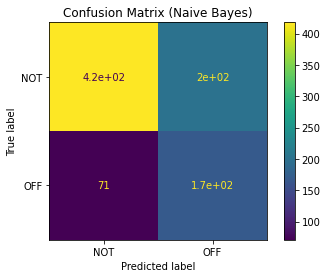

In [ ]:
plot = plot_confusion_matrix(nb_classifier,X_test,y_test)
plot.ax_.set_title("Confusion Matrix (Naive Bayes)")
plt.show()

## Random Forest Classifier

### Cross Validation


In [ ]:
fold_count = 0
accuracy = [0 for i in range(k_fold.get_n_splits())]
f1_scores = [0 for i in range(k_fold.get_n_splits())]

for train_index, test_index in k_fold.split(X_train, y_train):
    
    fold_count+=1
    print('Fold:',fold_count)

    # initialization
    X_train_temp, X_test_temp = X_train[train_index], X_train[test_index]
    y_train_temp, y_test_temp = y_train.iloc[train_index], y_train.iloc[test_index]
    rf_classifier = RandomForestClassifier()

    # training
    rf_classifier = rf_classifier.fit(X_train_temp,y_train_temp)

    # prediction
    y_pred_temp = rf_classifier.predict(X_test_temp)

    # evaluation
    accuracy[fold_count-1] = accuracy_score(y_test_temp,y_pred_temp)
    f1_scores[fold_count-1] = f1_score(y_test_temp, y_pred_temp, average='macro')
    
    print('accuracy:',accuracy[fold_count-1])
    print('f1 score:',f1_scores[fold_count-1])
    print()


print('Overall')
print('accuracy:',np.mean(accuracy))
print('f1 score:',np.mean(f1_scores))

Fold: 1
accuracy: 0.7654833836858006
f1 score: 0.7070052731310853

Fold: 2
accuracy: 0.7707703927492447
f1 score: 0.706783345054075

Fold: 3
accuracy: 0.7590634441087614
f1 score: 0.6911100790954667

Fold: 4
accuracy: 0.7707703927492447
f1 score: 0.7078348068504686

Fold: 5
accuracy: 0.7598187311178247
f1 score: 0.6948280548397969

Overall
accuracy: 0.7651812688821753
f1 score: 0.7015123117941785


### Training

In [ ]:
# rf_classifier = RandomForestClassifier()

In [ ]:
# rf_classifier = rf_classifier.fit(X_train,y_train)

In [ ]:
# joblib.dump(rf_classifier,'randomforest.model')

['randomforest.model']

In [ ]:
rf_classifier = joblib.load('randomforest.model')

### Prediction

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         NOT       0.83      0.95      0.89       620
         OFF       0.80      0.50      0.62       240

    accuracy                           0.83       860
   macro avg       0.81      0.73      0.75       860
weighted avg       0.82      0.83      0.81       860



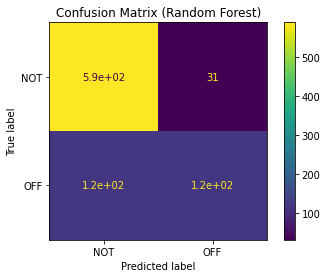

In [ ]:
plot = plot_confusion_matrix(rf_classifier,X_test,y_test)
plot.ax_.set_title("Confusion Matrix (Random Forest)")
plt.show()

## SVM

### Cross Validation

In [ ]:
fold_count = 0
accuracy = [0 for i in range(k_fold.get_n_splits())]
f1_scores = [0 for i in range(k_fold.get_n_splits())]

for train_index, test_index in k_fold.split(X_train, y_train):
    
    fold_count+=1
    print('Fold:',fold_count)

    # initialization
    X_train_temp, X_test_temp = X_train[train_index], X_train[test_index]
    y_train_temp, y_test_temp = y_train.iloc[train_index], y_train.iloc[test_index]
    svm_classifier = svm.SVC()

    # training
    svm_classifier = svm_classifier.fit(X_train_temp,y_train_temp)

    # prediction
    y_pred_temp = svm_classifier.predict(X_test_temp)

    # evaluation
    accuracy[fold_count-1] = accuracy_score(y_test_temp,y_pred_temp)
    f1_scores[fold_count-1] = f1_score(y_test_temp, y_pred_temp, average='macro')
    
    print('accuracy:',accuracy[fold_count-1])
    print('f1 score:',f1_scores[fold_count-1])
    print()


print('Overall')
print('accuracy:',np.mean(accuracy))
print('f1 score:',np.mean(f1_scores))

Fold: 1
accuracy: 0.7571752265861027
f1 score: 0.6802210459830711

Fold: 2
accuracy: 0.754154078549849
f1 score: 0.6733537157869904

Fold: 3
accuracy: 0.745845921450151
f1 score: 0.6564090907075265

Fold: 4
accuracy: 0.7469788519637462
f1 score: 0.6563239979667993

Fold: 5
accuracy: 0.752643504531722
f1 score: 0.6690216651848935

Overall
accuracy: 0.7513595166163142
f1 score: 0.6670659031258562


### Training

In [ ]:
# svm_classifier = svm.SVC()

In [ ]:
# svm_classifier = svm_classifier.fit(X_train, y_train)

In [ ]:
# joblib.dump(svm_classifier,'svm.model')

['svm.model']

In [ ]:
svm_classifier = joblib.load('svm.model')

### Prediction

In [ ]:
y_pred_svm = svm_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         NOT       0.81      0.94      0.87       620
         OFF       0.73      0.45      0.56       240

    accuracy                           0.80       860
   macro avg       0.77      0.69      0.71       860
weighted avg       0.79      0.80      0.78       860



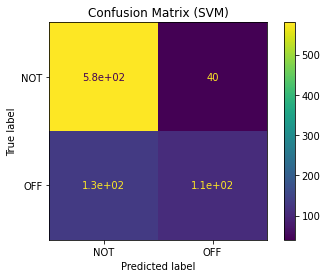

In [ ]:
plot = plot_confusion_matrix(svm_classifier,X_test,y_test)
plot.ax_.set_title("Confusion Matrix (SVM)")
plt.show()

## Multi Layer Perceptron

In [ ]:
class NN:

    def __init__(self,layers,activation,alpha):
        
        self.n_layers = len(layers)
        self.layers = layers
        self.activation = activation
        self.alpha = alpha
        
        self.model = MLPClassifier(hidden_layer_sizes=self.layers,
                                   activation=self.activation,
                                   alpha=self.alpha,
                                   max_iter=500)
    
    def fit(self,X,y):
        self.model = self.model.fit(X,y)

    def predict(self,X):
        return self.model.predict(X)
    
    def loss(self):
        return self.model.loss_

In [ ]:
NN_classifier = NN(layers=[200,100,50],activation='relu',alpha=1e-4)

In [ ]:
NN_classifier.fit(X_train,y_train)

In [ ]:
y_pred_NN = NN_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_NN))

              precision    recall  f1-score   support

         NOT       0.84      0.83      0.83       620
         OFF       0.57      0.59      0.58       240

    accuracy                           0.76       860
   macro avg       0.71      0.71      0.71       860
weighted avg       0.76      0.76      0.76       860



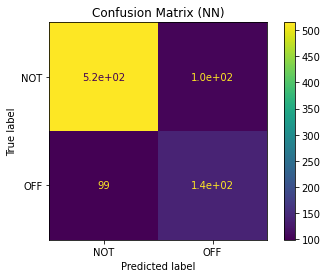

In [ ]:
plot = plot_confusion_matrix(NN_classifier.model,X_test,y_test)
plot.ax_.set_title("Confusion Matrix (NN)")
plt.show()

# Majority Voting

In [ ]:
all_models = {'naive bayes': y_pred_nb,
            'logistic regression': y_pred_logistic,
            'random forest': y_pred_rf,
            'SVM': y_pred_svm}

In [ ]:
for key_1 in all_models:

    combination = []
    model_rep = ''
    
    for key_2 in all_models:
        if key_1 != key_2:
            combination.append(all_models[key_2])
            model_rep += ' + ' + key_2
        
    print(model_rep[3:])

    y_pred_voting = stats.mode(np.array(combination))[0][0]
    
    print('accuracy:',accuracy_score(y_test,y_pred_voting))
    print('f1 (macro):',f1_score(y_test, y_pred_voting, average='macro'))

    print()

logistic regression + random forest + SVM
accuracy: 0.8220930232558139
f1 (macro): 0.7520871369060067

naive bayes + random forest + SVM
accuracy: 0.8162790697674419
f1 (macro): 0.7478548736676465

naive bayes + logistic regression + SVM
accuracy: 0.7953488372093023
f1 (macro): 0.7336167996001437

naive bayes + logistic regression + random forest
accuracy: 0.8104651162790698
f1 (macro): 0.7543627853837271

